In [5]:
import os
import sys
import pandas
import numpy, scipy

import findspark
findspark.init("/opt/local/spark/spark")

import pyspark
from pyspark.sql.window import Window
import pyspark.sql.functions as func

from pyspark.rdd import reduce
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeansModel, KMeans
from pyspark.ml.linalg import SparseVector, VectorUDT, Vector, Vectors

In [6]:
conf = pyspark.SparkConf().setMaster("local[*]").set("spark.driver.memory", "4G").set("spark.executor.memory", "4G")
sc = pyspark.SparkContext(conf=conf)
spark = pyspark.sql.SparkSession(sc)

In [2]:
folder = "/Users/simondi/PROJECTS/target_infect_x_project/results/2-analysis/4-lm/current"

In [2]:
folder = "/home/simon/PROJECTS/koios/data/glm-transformed"

In [8]:
 df = spark.read.parquet(folder)

In [9]:
df.take(1)

[Row(well='a06', gene='none', sirna='si00577689', image_idx='53', object_idx='32', is_infected='0', cells_areashape_area=-0.9855555891990662, cells_areashape_eccentricity=1.2148281335830688, cells_areashape_extent=-2.4239962100982666, cells_areashape_formfactor=-1.825907826423645, cells_areashape_majoraxislength=-0.25500303506851196, cells_areashape_minoraxislength=-1.4735724925994873, cells_areashape_orientation=1.3759647607803345, cells_areashape_perimeter=-0.028605397790670395, cells_children_bacteria_count=0.0, cells_children_invasomes_count=0.0, cells_location_center_x=-1.3795465230941772, cells_location_center_y=-1.0461022853851318, cells_neighbors_anglebetweenneighbors_2=1.146404504776001, cells_neighbors_firstclosestobjectnumber_2=-0.92804354429245, cells_neighbors_firstclosestxvector_2=0.38892245292663574, cells_neighbors_firstclosestyvector_2=0.49482589960098267, cells_neighbors_numberofneighbors_2=-1.0195190906524658, cells_neighbors_percenttouching_2=-0.003031225875020027, 

In [3]:
feats = pandas.read_csv(folder + "/feature_cols.tsv", sep="\t", header=-1)

In [4]:
features = ["intercept"] + list(feats[0].values)

In [5]:
tab = pandas.read_csv(folder + "/glm-table.tsv", sep="\t")

In [7]:
tab["features"] = features

In [11]:
tab = tab.reindex(tab.beta.abs().sort_values(ascending=False).index)

In [12]:
tab.to_csv(folder + "/glm-table_appended.tsv", sep="\t")

In [35]:
pr = pandas.read_csv(folder + "/glm-precision_recall.tsv", sep="\t")
roc = pandas.read_csv(folder + "/glm-roc_curve.tsv", sep="\t")

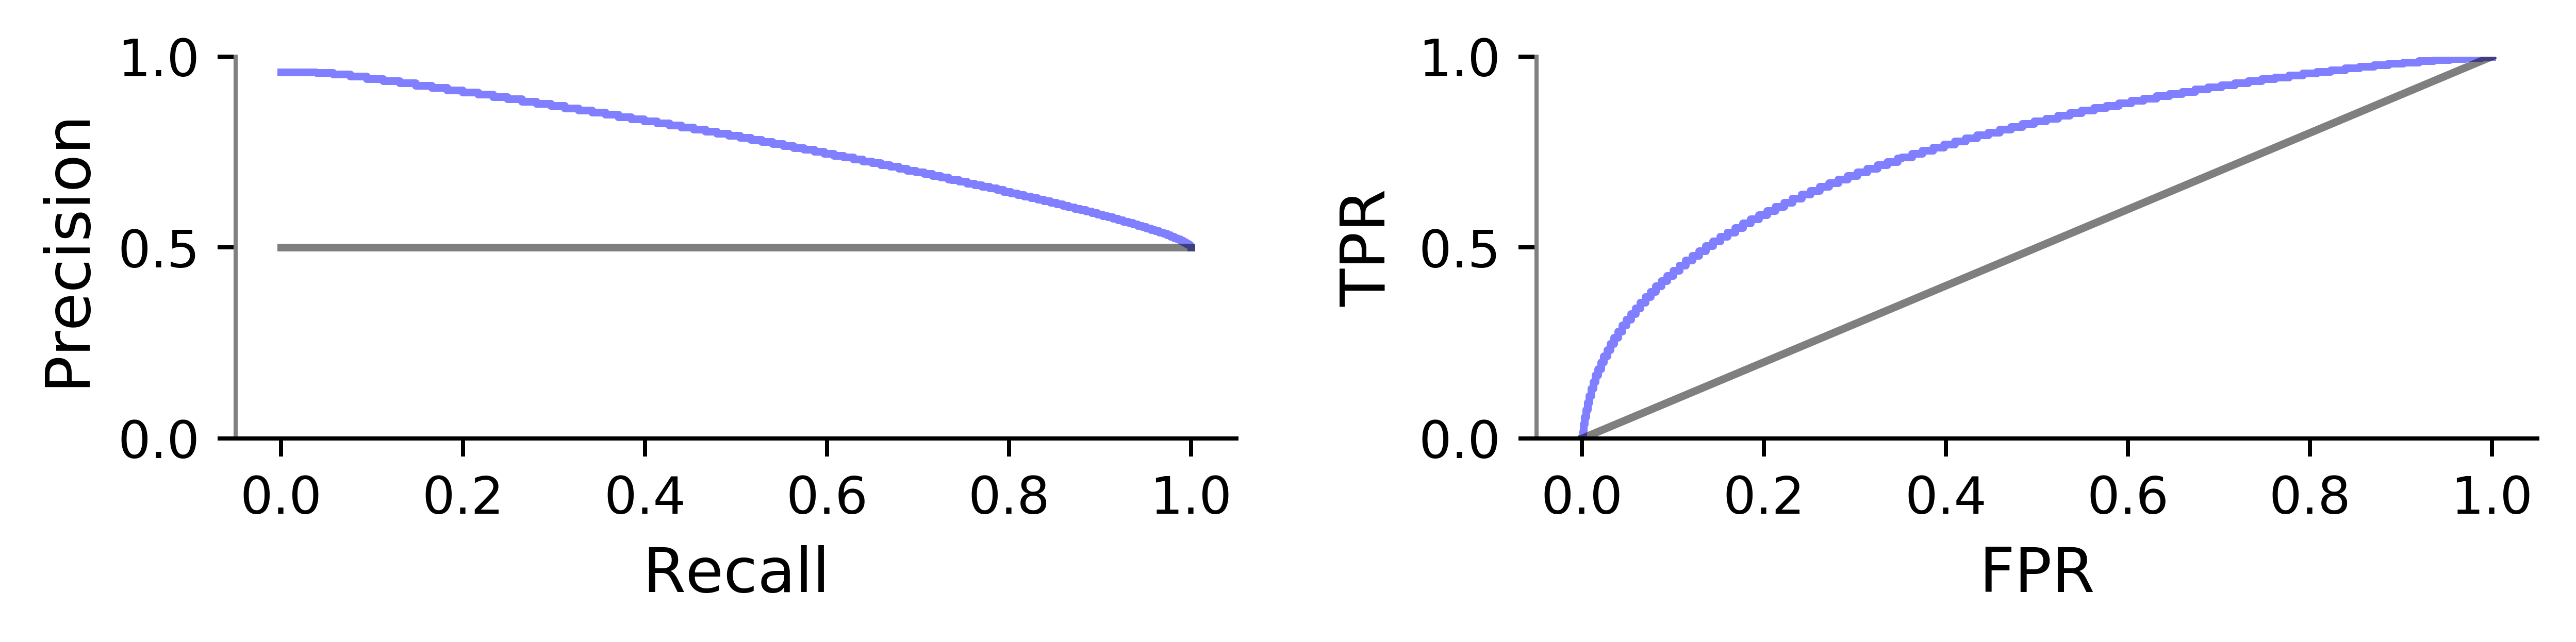

In [80]:

plt.figure(figsize=(8, 3), dpi=720)
plt.subplots_adjust(wspace = 0.2)
plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", "0.25", "0.5", "0.75", "1"])
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"])

ax = plt.subplot(221)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('grey')
ax.grid(linestyle="")

plt.step(pr["recall"], pr["precision"], color='b', alpha=0.5, where='post')
plt.plot([0, 0.5, 1], [0.5, 0.5, .5] , color="black", alpha=.5)

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
ax.set_ylim([0, 1])

ax = plt.subplot(222)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('grey')

ax.grid(linestyle="")

plt.step(roc["FPR"], roc["TPR"], color='b', alpha=0.5, where='post')
plt.plot([0, 0.5, 1], [0, 0.5, 1] , color="black", alpha=.5)

plt.xlabel("FPR", fontsize=12)
plt.ylabel("TPR", fontsize=12)
ax.set_ylim([0, 1])

plt.subplots_adjust(wspace = 0.3)
plt.show()